# Part 4: Predict the Backup size for each of the workflows separately.

* Using linear regression model. Explain if the fit is improved?
* Try fitting a more complex regression function to your data. You can try a polynomial function of your variables. Try increasing the degree of the polynomial to improve your fit. Again, use a 10 fold cross validation to evaluate your results. Plot the average train and test RMSE of the trained model against the degree of the polynomial you use. Can you find a threshold on the degree of the fitted polynomial beyond which the generalization error of your model gets worse? Can you explain how cross validation helps controlling the complexity of your model?

## Importing libraries


In [1]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn

## Loading data

In [2]:
data=pd.read_csv('./network_backup_dataset.csv')
datanp = np.array(data.values)
X_train = datanp[:,[0,1,2,3,4]]
Y_train = datanp[:,[5]]
Y_train = Y_train.flatten()
Y_train = list(map(float,Y_train))
Y_train = np.asarray(Y_train)

## Label encoding

In [3]:
for i in range(0,5):
    labelencoder_X_0 = LabelEncoder()
    X_train[:,i] = labelencoder_X_0.fit_transform(X_train[:,i])

In [4]:
X_day = (X_train[:,0]*7)+X_train[:,1]

## One Hot Encoding

In [5]:
def transform(X_train, trans_list):
    hot = list()
    for i in range(0, len(trans_list)):
        if(trans_list[i] == 1):
            hot.append(i)
    onehotencoder = OneHotEncoder(categorical_features = hot, sparse = False)
    return onehotencoder.fit_transform(X_train)
X_train = transform(X_train,[1,1,1,1,1])

C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [6]:
import math
train_res = list()
test_res = list()
for i in range(0,5):
    train_res.append(list())
    test_res.append(list())

In [7]:
train_res

[[], [], [], [], []]

In [8]:
test_res

[[], [], [], [], []]

In [9]:
for i in range(0,5):
    labelencoder_X_0 = LabelEncoder()
    datanp[:,i] = labelencoder_X_0.fit_transform(datanp[:,i])

In [11]:
datanp

array([[0, 1, 0, ..., 0, 0.0, 0],
       [0, 1, 0, ..., 4, 0.0, 0],
       [0, 1, 0, ..., 5, 0.0, 0],
       ...,
       [14, 3, 5, ..., 19, 0.19857243645989475, 2],
       [14, 3, 5, ..., 18, 0.1995700723304316, 2],
       [14, 3, 5, ..., 17, 0.2012005192156364, 2]], dtype=object)

## Linear Regression 

In [12]:
for wf in range(0,5):
    tempwf = list(filter(lambda x: x[3] == wf, datanp)) #3 is an index for workflow
    tempwf = np.asarray(tempwf)
    X_train = tempwf[:,[0,1,2,3,4]]
    Y_train = tempwf[:,[5]]
    Y_train = Y_train.flatten()
    Y_train = list(map(float,Y_train))
    Y_train = np.asarray(Y_train)
    
    for degree in range(0,10):
        pf = sklearn.preprocessing.PolynomialFeatures(degree = degree)
        temp = pf.fit_transform(X_train)
        train_rmse = list()
        test_rmse = list()
        kf = KFold(n_splits = 10)
        kf.get_n_splits(X_train)
        for train, test in kf.split(temp):
            lr = LinearRegression()
            lr.fit(temp[train], Y_train[train])
            train_rmse.append(math.sqrt(metrics.mean_squared_error(Y_train[train], lr.predict(temp[train]))))
            test_rmse.append(math.sqrt(metrics.mean_squared_error(Y_train[test], lr.predict(temp[test]))))
        train_res[wf].append(np.average(train_rmse))
        test_res[wf].append(np.average(test_rmse))


In [13]:
for i in range(0,5):
    print("For workflow "+str(i))
    print("Average Train RMSE "+ str(train_res[i][0]))
    print("Average Test RMSE "+ str(test_res[i][0]))

For workflow 0
Average Train RMSE 0.05560475278777947
Average Test RMSE 0.05566325104171723
For workflow 1
Average Train RMSE 0.16458632008043234
Average Test RMSE 0.16276029264883546
For workflow 2
Average Train RMSE 0.04385087396617487
Average Test RMSE 0.04352574330339827
For workflow 3
Average Train RMSE 0.007311165770798438
Average Test RMSE 0.007254272272724521
For workflow 4
Average Train RMSE 0.10389666192075483
Average Test RMSE 0.10348122703290456


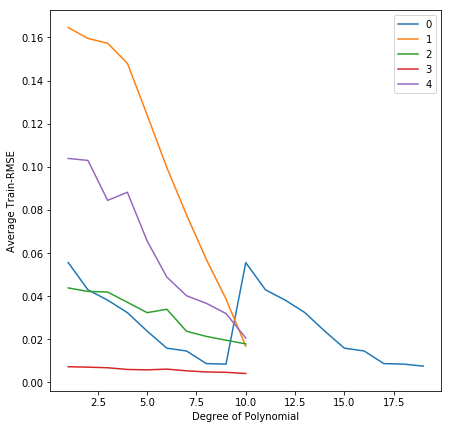

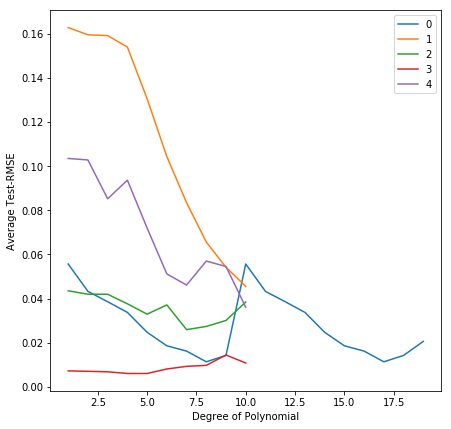

In [14]:
plt.figure(figsize=(7,7))
for i in range(0,5):
    plt.plot(range(1,len(train_res[i])+1),train_res[i], label = i)
plt.xlabel("Degree of Polynomial")
plt.ylabel("Average Train-RMSE")
plt.legend()
plt.savefig("train.png")
plt.show()

plt.close()
plt.figure(figsize=(7,7))

for i in range(0,5):
    plt.plot(range(1,len(test_res[i])+1),test_res[i], label = i)
plt.xlabel("Degree of Polynomial")
plt.ylabel("Average Test-RMSE")
plt.legend()
plt.savefig("test.png")
plt.show()

In [16]:
def plot_py(predictions, Y_train,i):
    plt.close()
    plt.figure(figsize=(7,7))
    plt.xlabel("Time")
    plt.ylabel("Fitted Values vs True Values")
    plt.scatter(range(0,len(Y_train)),Y_train,label='True')
    plt.scatter(range(0,len(Y_train)),predictions, label ='Fitted')
    plt.legend()
    plt.savefig("pd1"+"_"+str(i)+".png")
    plt.show()
    plt.close()
    
    plt.figure(figsize=(7,7))
    plt.xlabel("True Values")
    plt.ylabel("Prediction Values")
    plt.scatter(Y_train,predictions)
    plt.savefig("pd2"+"_"+str(i)+".png")
    plt.show()
    plt.close()
    
    plt.figure(figsize=(7,7))
    plt.xlabel("Time")
    plt.ylabel("Residual Values vs Predicted Values")
    plt.scatter(range(0,len(Y_train)),predictions,label='Fitted')
    plt.scatter(range(0,len(Y_train)),Y_train-predictions, label ='Residual')
    plt.legend()
    plt.savefig("pd3"+"_"+str(i)+".png")
    plt.show()
    plt.close()
    
    plt.figure(figsize=(7,7))
    plt.xlabel("Prediction Values")
    plt.ylabel("Residual Values")
    plt.scatter(predictions,Y_train-predictions)
    plt.savefig("pd4"+"_"+str(i)+".png")
    plt.show()
    plt.close()


Plotting for the best Polynomial Degrees for each Workflow ID


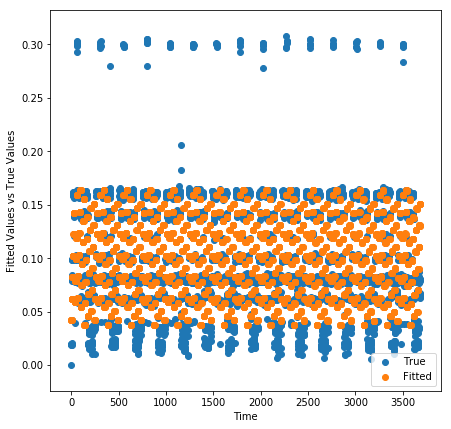

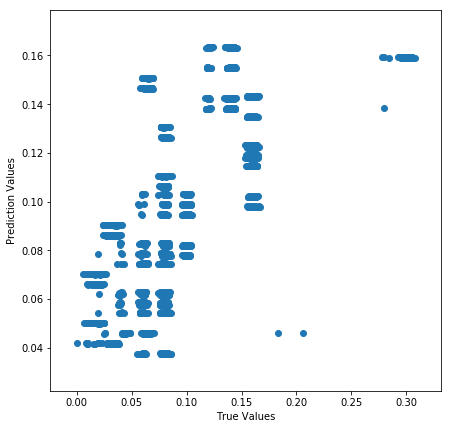

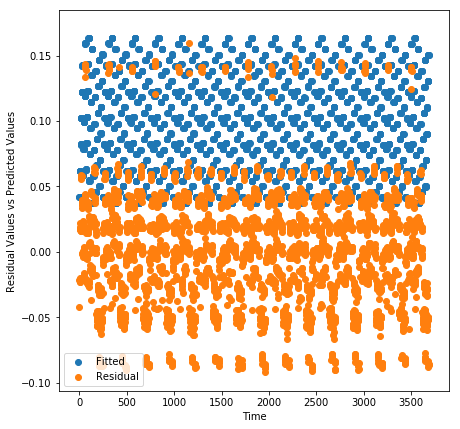

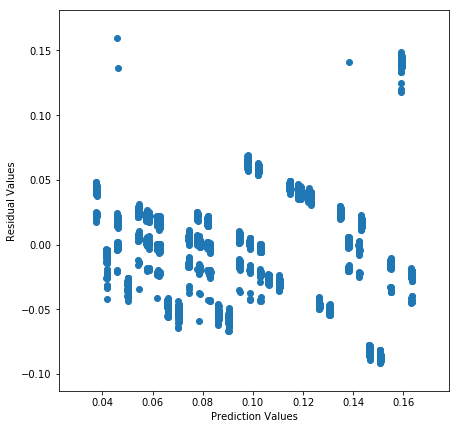

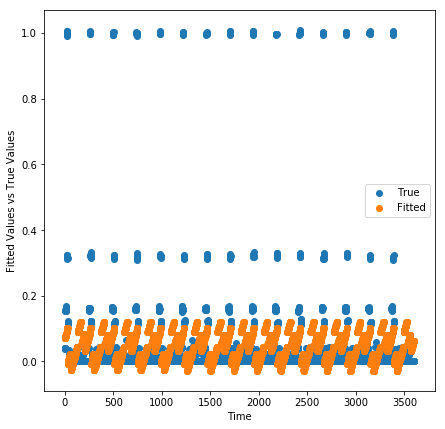

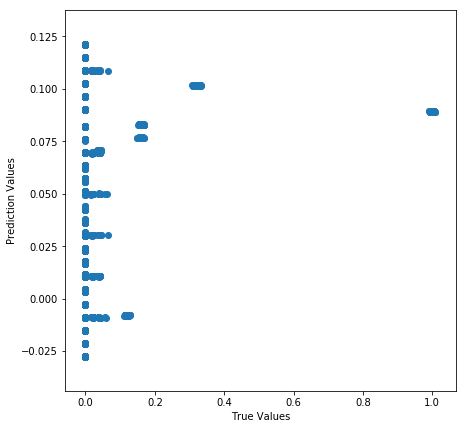

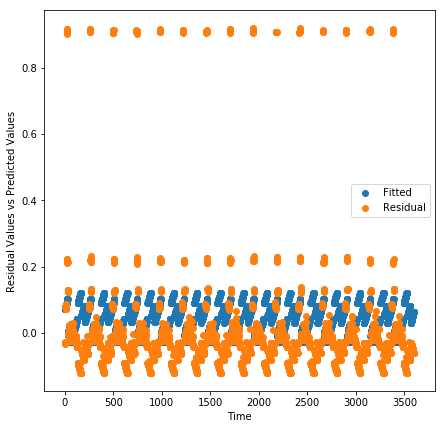

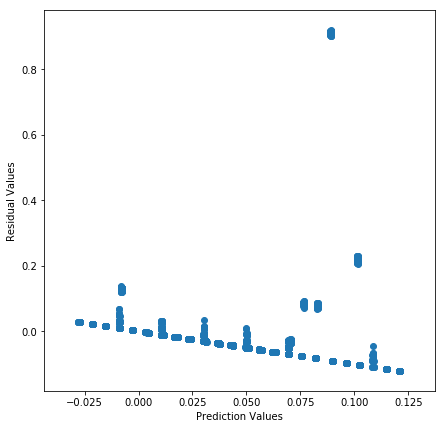

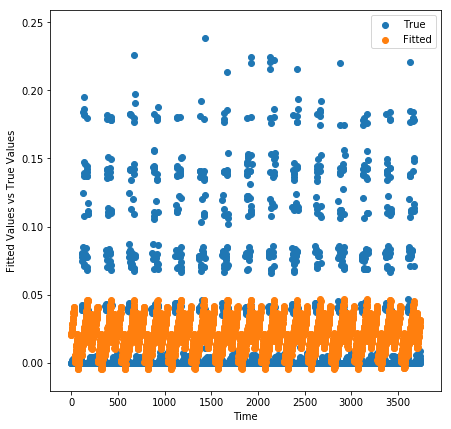

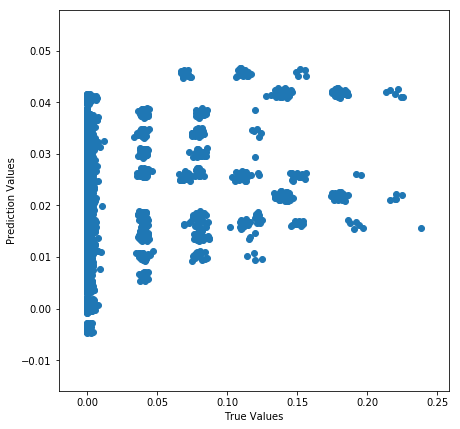

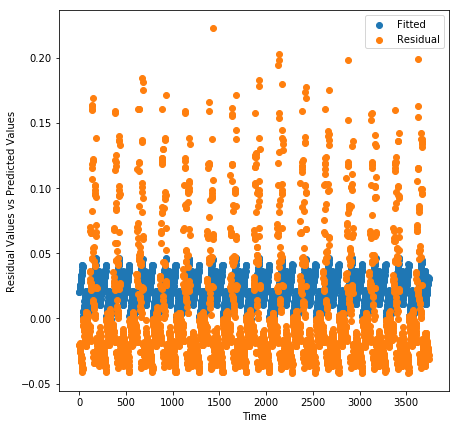

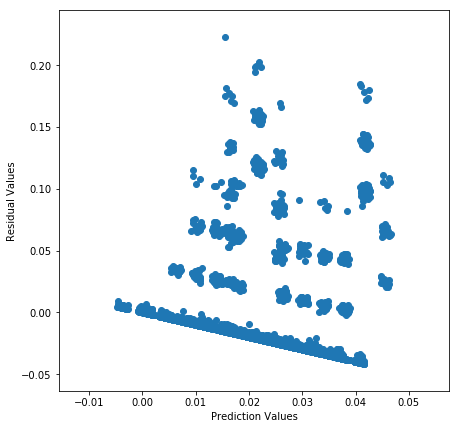

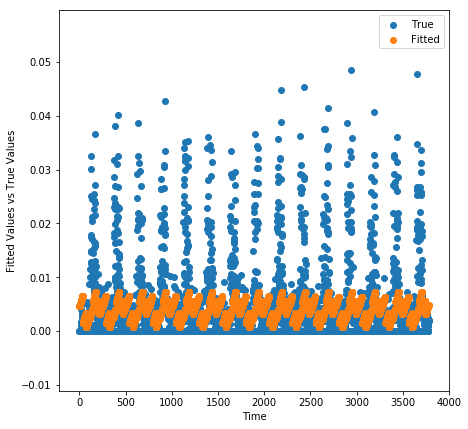

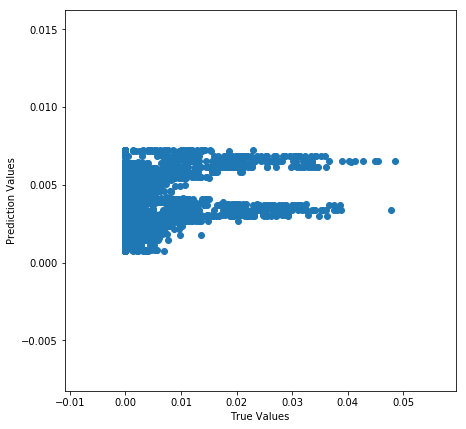

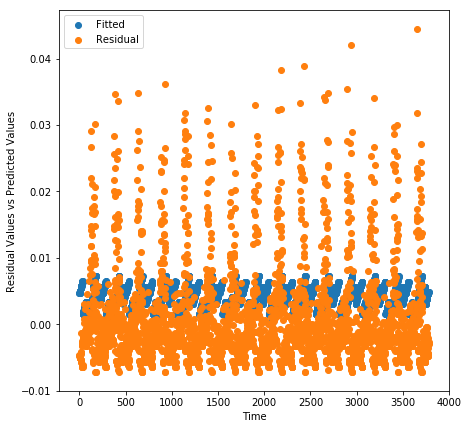

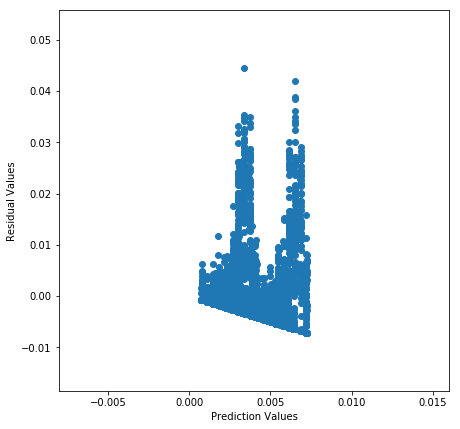

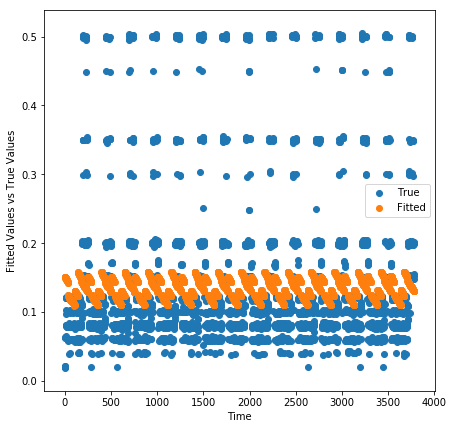

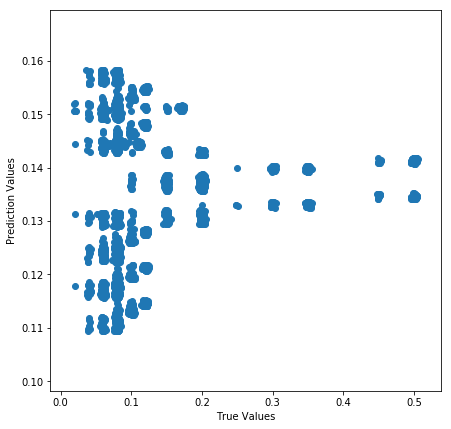

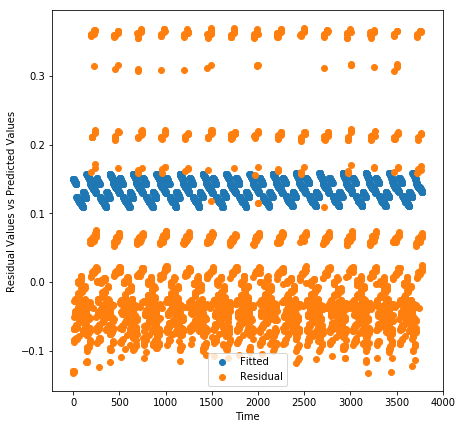

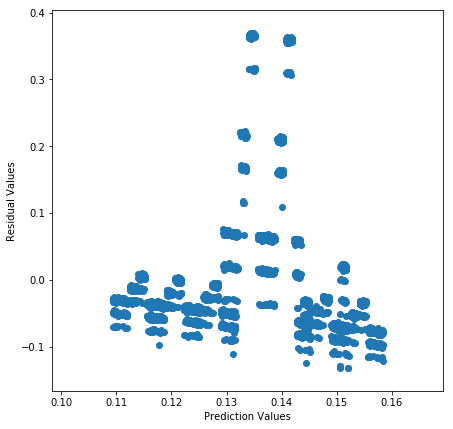

In [17]:
print("Plotting for the best Polynomial Degrees for each Workflow ID")

degree = [8,9,7,5,9]
for wf in range(0,5):
    tempwf = list(filter(lambda x: x[3] == wf, datanp))
    tempwf = np.asarray(tempwf)
    X_train = tempwf[:,[0,1,2,3,4]]
    Y_train = tempwf[:,[5]]
    Y_train = Y_train.flatten()
    Y_train = list(map(float,Y_train))
    Y_train = np.asarray(Y_train)
    pf = sklearn.preprocessing.PolynomialFeatures(degree = degree[i])
    temp = pf.fit_transform(X_train)
    lr = LinearRegression()
    lr.fit(X_train, Y_train)
    predictions = lr.predict(X_train)
    plot_py(predictions,Y_train,wf)